**Project Objective:**
The goal is to predict customers' loan repayment ability to minimize risks and protect profits. 

**Dataset link** (All Lending Club loan data): https://www.google.com/url?q=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fwordsforthewise%2Flending-club%2Fdata

## Reading the dataset

In [4]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [5]:
lendingclub_accepted = pd.read_csv("accepted_2007_to_2018Q4.csv")
lendingclub_accepted.shape

C:\Users\Admin\AppData\Local\Temp\ipykernel_17796\727308061.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  lendingclub_accepted = pd.read_csv("accepted_2007_to_2018Q4.csv")


(2260701, 151)

In [6]:
lendingclub_accepted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [7]:
lendingclub_accepted.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [8]:
df = lendingclub_accepted.copy()

## Preprocessing data

**Cleaning data**

In [11]:
#Check for Duplicates
df.duplicated().sum()

0

In [12]:
#Check for Missing Values
df.isnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
1,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
2,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
3,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
4,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
2260697,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
2260698,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
2260699,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [13]:
# Check for NULL Values
df.isnull().sum().sort_values(ascending=False)

member_id                                     2260701
orig_projected_additional_accrued_interest    2252050
hardship_end_date                             2249784
hardship_start_date                           2249784
hardship_type                                 2249784
                                               ...   
policy_code                                        33
revol_bal                                          33
fico_range_high                                    33
fico_range_low                                     33
id                                                  0
Length: 151, dtype: int64

In [14]:
cols_to_drop = df.isnull().sum().sort_values(ascending=False).head(95).index
df = df.drop(columns=cols_to_drop)
df.shape

(2260701, 56)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 56 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          object 
 1   loan_amnt                   float64
 2   funded_amnt                 float64
 3   funded_amnt_inv             float64
 4   term                        object 
 5   int_rate                    float64
 6   installment                 float64
 7   grade                       object 
 8   sub_grade                   object 
 9   home_ownership              object 
 10  annual_inc                  float64
 11  verification_status         object 
 12  issue_d                     object 
 13  loan_status                 object 
 14  pymnt_plan                  object 
 15  url                         object 
 16  purpose                     object 
 17  zip_code                    object 
 18  addr_state                  object 
 19  dti                  

In [16]:
# Check the ratio of null values in each column
nulls = df.isnull().sum().sort_values(ascending=False)
nulls_percentage = (nulls / df.shape[0] * 100)
nulls_percentage.head(20)

last_pymnt_d                  0.108816
revol_util                    0.081170
dti                           0.077144
pub_rec_bankruptcies          0.061839
collections_12_mths_ex_med    0.007874
chargeoff_within_12_mths      0.007874
tax_liens                     0.006104
last_credit_pull_d            0.004645
inq_last_6mths                0.002787
delinq_2yrs                   0.002743
open_acc                      0.002743
pub_rec                       0.002743
earliest_cr_line              0.002743
acc_now_delinq                0.002743
delinq_amnt                   0.002743
total_acc                     0.002743
annual_inc                    0.001637
zip_code                      0.001504
recoveries                    0.001460
total_rec_int                 0.001460
dtype: float64

In [17]:
df.loan_status.value_counts()

loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_17796\3213568911.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.loan_status.value_counts().index, y=df.loan_status.value_counts().values, palette="viridis")


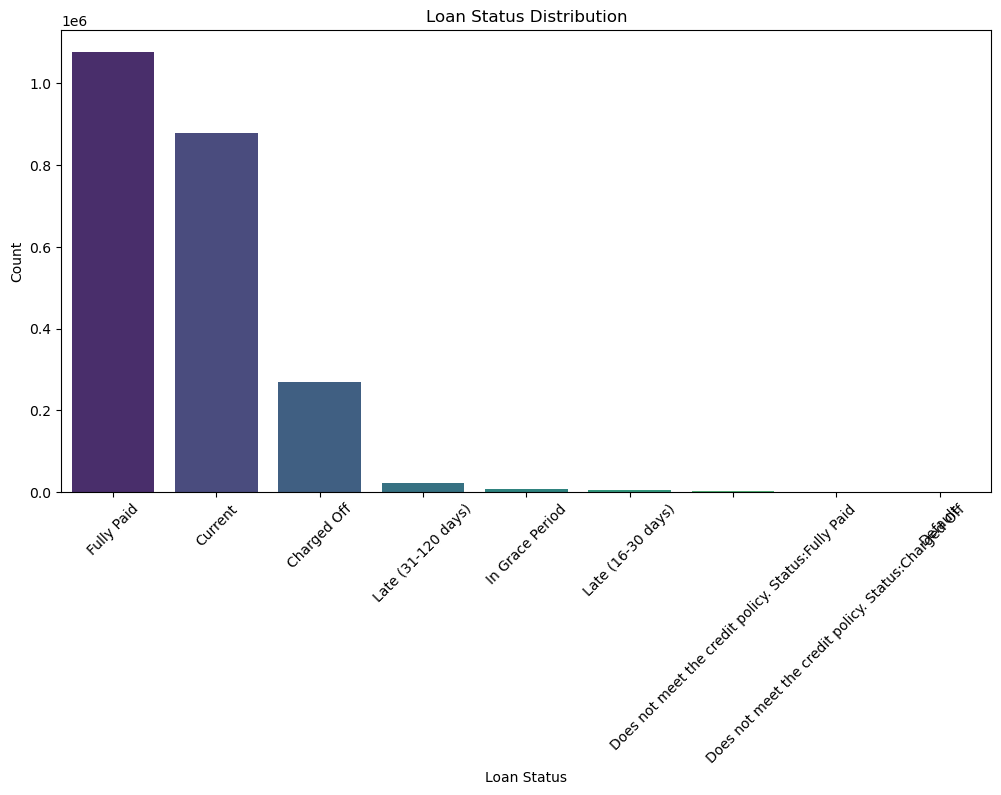

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df.loan_status.value_counts().index, y=df.loan_status.value_counts().values, palette="viridis")

# Set title and axis labels
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Meaning of *loan_status column* values:

- **Fully Paid**: The loan has been fully repaid, including both principal and interest.
- **Current**: The loan is being paid on time, with no overdue amounts.
- **Charged Off**: The loan has been written off due to the borrower failing to make payments for an extended period, considered a loss for the lender.
- **Late (31-120 days)**: The loan is overdue by 31 to 120 days.
- **In Grace Period**: The loan is in a grace period, the time between the due date and the point at which it is considered late.
- **Late (16-30 days)**: The loan is overdue by 16 to 30 days.
- **Does not meet the credit policy. Status: Fully Paid**: The loan did not meet credit policy but was fully repaid.
- **Does not meet the credit policy. Status: Charged Off**: The loan did not meet credit policy and was charged off.
- **Default**: The loan is in default, typically 120+ days overdue with no payment made.

The `loan_status` column contains 9 values, but the most frequent ones are "Fully Paid" and "Charged Off." We’ll focus on these two values since they clearly represent the oan status.


In [20]:
# Keep only the rows with 'Fully Paid' and 'Charged Off' values in the loan_status column
df = df[df.loan_status.isin(['Fully Paid', 'Charged Off'])]
print(df.shape)

(1345310, 56)


C:\Users\Admin\AppData\Local\Temp\ipykernel_17796\1630947438.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.loan_status.value_counts().index, y=df.loan_status.value_counts().values, palette="viridis")


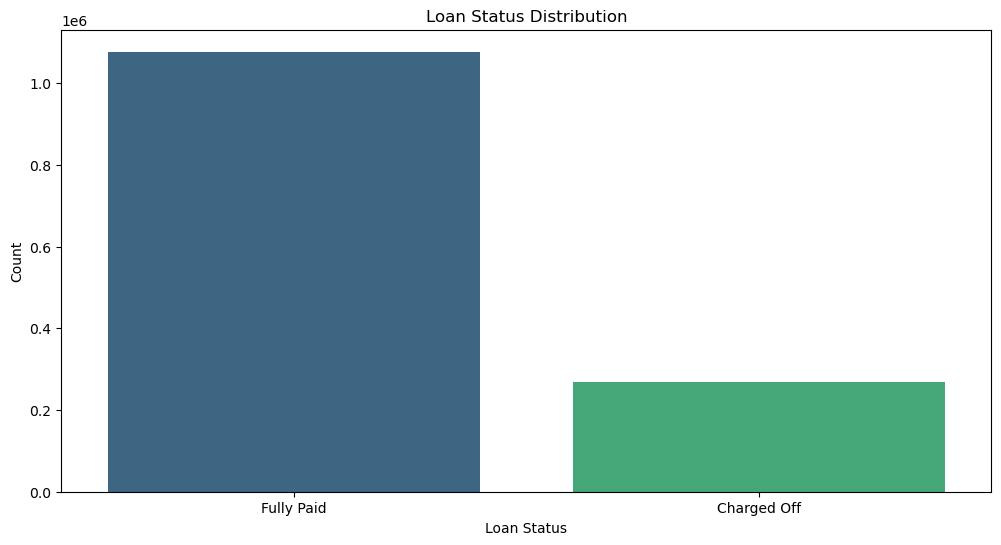

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df.loan_status.value_counts().index, y=df.loan_status.value_counts().values, palette="viridis")

# Set the title and axis labels
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [22]:
# Loan amount
df.loan_amnt.value_counts()

loan_amnt
10000.0    99603
12000.0    72951
20000.0    70333
15000.0    70050
35000.0    51190
           ...  
39700.0        1
39575.0        1
39450.0        1
39050.0        1
36725.0        1
Name: count, Length: 1556, dtype: int64

In [23]:
# Check columns that contain only one unique value
for column in df.columns:
    if df[column].nunique() == 1:
        print("Column with all identical values:", column)

Column with all identical values: pymnt_plan
Column with all identical values: out_prncp
Column with all identical values: out_prncp_inv
Column with all identical values: policy_code
Column with all identical values: hardship_flag


In [24]:
# After checking the columns, we found 5 columns to drop because their values are all identical
cols_to_drop = ['pymnt_plan', 'out_prncp', 'out_prncp_inv', 'policy_code', 'hardship_flag']
df = df.drop(columns=cols_to_drop)
df.shape

(1345310, 51)

In [25]:
# This column has no values
df = df.drop(columns='zip_code')

**Data Encoding**

In [27]:
df[['issue_d', 'last_pymnt_d', 'last_credit_pull_d']]

,issue_d,last_pymnt_d,last_credit_pull_d
0,Dec-2015,Jan-2019,Mar-2019
1,Dec-2015,Jun-2016,Mar-2019
2,Dec-2015,Jun-2017,Mar-2019
4,Dec-2015,Jul-2016,Mar-2018
5,Dec-2015,May-2017,May-2017
...,...,...,...
2260688,Oct-2016,Aug-2018,Mar-2019
2260690,Oct-2016,Jul-2018,Jul-2018
2260691,Oct-2016,Mar-2017,Dec-2018
2260692,Oct-2016,Mar-2018,Mar-2019


In [28]:
df['id'] = df['id'].astype(int)
df['issue_d'] = pd.to_datetime(df['issue_d']).map(pd.Timestamp.toordinal)
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line']).map(pd.Timestamp.toordinal)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17796\4161994134.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['issue_d'] = pd.to_datetime(df['issue_d']).map(pd.Timestamp.toordinal)
C:\Users\Admin\AppData\Local\Temp\ipykernel_17796\4161994134.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line']).map(pd.Timestamp.toordinal)


In [29]:
# Convert to datetime, but also handle NaT values if the conversion fails
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], errors='coerce')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], errors='coerce')

# Apply toordinal but only for non-NaT values
df['last_pymnt_d'] = df['last_pymnt_d'].map(lambda x: x.toordinal() if pd.notna(x) else np.nan)
df['last_credit_pull_d'] = df['last_credit_pull_d'].map(lambda x: x.toordinal() if pd.notna(x) else np.nan)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17796\3896240124.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], errors='coerce')
C:\Users\Admin\AppData\Local\Temp\ipykernel_17796\3896240124.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], errors='coerce')


In [30]:
df['last_pymnt_d']

0          737060.0
1          736116.0
2          736481.0
4          736146.0
5          736450.0
             ...   
2260688    736907.0
2260690    736876.0
2260691    736389.0
2260692    736754.0
2260697    736603.0
Name: last_pymnt_d, Length: 1345310, dtype: float64

In [31]:
# Assuming df is your DataFrame
columns_to_factorize = [
    'term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
    'loan_status', 'purpose', 'addr_state', 'initial_list_status',
    'application_type', 'disbursement_method', 'debt_settlement_flag'
]

# Dictionary to store the mapping of original values to encoded values
factorized_mappings = {}

for column in columns_to_factorize:
    encoded_values, original_values = pd.factorize(df[column])
    df[column] = encoded_values
    factorized_mappings[column] = {original: encoded for original, encoded in zip(original_values, range(len(original_values)))}

# Display the factorized mappings
for column, mapping in factorized_mappings.items():
    print(f"Column: {column}")
    for original, encoded in mapping.items():
        print(f"{original} -> {encoded}")
    print()

Column: term
 36 months -> 0
 60 months -> 1

Column: grade
C -> 0
B -> 1
F -> 2
A -> 3
E -> 4
D -> 5
G -> 6

Column: sub_grade
C4 -> 0
C1 -> 1
B4 -> 2
F1 -> 3
C3 -> 4
B2 -> 5
B1 -> 6
A2 -> 7
B5 -> 8
C2 -> 9
E2 -> 10
A4 -> 11
E3 -> 12
C5 -> 13
A1 -> 14
D4 -> 15
F3 -> 16
D1 -> 17
B3 -> 18
D3 -> 19
D5 -> 20
A5 -> 21
F2 -> 22
E4 -> 23
D2 -> 24
E1 -> 25
F5 -> 26
E5 -> 27
A3 -> 28
G2 -> 29
G1 -> 30
G3 -> 31
G4 -> 32
F4 -> 33
G5 -> 34

Column: home_ownership
MORTGAGE -> 0
RENT -> 1
OWN -> 2
ANY -> 3
NONE -> 4
OTHER -> 5

Column: verification_status
Not Verified -> 0
Source Verified -> 1
Verified -> 2

Column: loan_status
Fully Paid -> 0
Charged Off -> 1

Column: purpose
debt_consolidation -> 0
small_business -> 1
home_improvement -> 2
major_purchase -> 3
credit_card -> 4
other -> 5
house -> 6
vacation -> 7
car -> 8
medical -> 9
moving -> 10
renewable_energy -> 11
wedding -> 12
educational -> 13

Column: addr_state
PA -> 0
SD -> 1
IL -> 2
GA -> 3
MN -> 4
SC -> 5
RI -> 6
NC -> 7
CA -> 8
VA -> 

In [32]:
# This column has no effect
df = df.drop(columns=['url'])
df.shape

(1345310, 49)

Check the correlation between columns

In [34]:
# Calculate correlation matrix
c = df.corr().abs()

# Unstack the correlation matrix
unstack_corr = c.unstack()

# Sort the pairs by correlation values in descending order
pairs = unstack_corr.sort_values(ascending=False)

# Convert pairs to DataFrame, drop duplicates, and reset index
corr_pairs = pd.DataFrame(pairs).drop_duplicates().reset_index()
corr_pairs.columns = ['feature1', 'feature2', 'corr']

# Define conditions
cond1 = (corr_pairs.feature1 != corr_pairs.feature2)
cond2 = (corr_pairs['corr'] > 0.80)

# Apply conditions
corr_pairs_filtered = corr_pairs[cond1 & cond2]

# Display filtered pairs
corr_pairs_filtered

,feature1,feature2,corr
1,fico_range_low,fico_range_high,1.000000
2,funded_amnt,loan_amnt,0.999562
3,total_pymnt_inv,total_pymnt,0.999293
4,funded_amnt_inv,funded_amnt,0.999095
5,loan_amnt,funded_amnt_inv,0.998567
6,recoveries,collection_recovery_fee,0.970515
7,total_pymnt,total_rec_prncp,0.967172
8,total_rec_prncp,total_pymnt_inv,0.966541
9,funded_amnt,installment,0.954053
10,loan_amnt,installment,0.953401


### fico_range_low and fico_range_high
- **fico_range_low**: The lowest FICO score in the borrower's credit range.
- **fico_range_high**: The highest FICO score in the borrower's credit range.
- **Meaning**: FICO scores indicate the borrower's creditworthiness, helping assess lending risk.

### loan_amnt
- **loan_amnt**: The amount requested and approved for the loan.
- **Meaning**: The principal amount the borrower wants to borrow.

### funded_amnt and funded_amnt_inv
- **funded_amnt**: The actual amount given to the borrower.
- **funded_amnt_inv**: The amount committed by investors.
- **Meaning**: These amounts may differ if the loan is not fully funded by investors.

### total_pymnt and total_pymnt_inv
- **total_pymnt**: The total amount paid by the borrower (principal + interest).
- **total_pymnt_inv**: The total amount received by investors.
- **Meaning**: Reflects the total payments made and received for the loan.

### collection_recovery_fee and recoveries
- **collection_recovery_fee**: Fee for recovering bad debt.
- **recoveries**: Amount recovered from defaulted loans.
- **Meaning**: Related to recovering money from delinquent loans.

### total_rec_prncp
- **total_rec_prncp**: The total principal repaid by the borrower.
- **Meaning**: Amount of loan principal repaid by the borrower, excluding interest.

### installment
- **installment**: The monthly payment the borrower must make.
- **Meaning**: The fixed monthly amount the borrower repays.

### issue_d
- **issue_d**: The loan issue date.
- **Meaning**: Date the loan was approved and issued.

### id
- **id**: Unique loan identifier.
- **Meaning**: A unique code for each loan in the system.

### last_fico_range_low and last_fico_range_high
- **last_fico_range_low**: The lowest FICO score in the borrower's most recent credit range.
- **last_fico_range_high**: The highest FICO score in the borrower's most recent credit range.
- **Meaning**: Shows changes in the borrower's credit score since the loan was issued.

---

### Summary:
- **FICO Scores**: Measure the borrower's credit risk.
- **Loan Amounts**: Represent requested and funded amounts.
- **Payments**: Show repayments made and received.
- **Recovery Fees**: Related to recovering bad debts.
- **Repayment and Installments**: Reflect the borrower's repayment ability.
- **Loa Information**: Includes the issue date and loan ID.


In [36]:
df[['funded_amnt', 'loan_amnt']]

,funded_amnt,loan_amnt
0,3600.0,3600.0
1,24700.0,24700.0
2,20000.0,20000.0
4,10400.0,10400.0
5,11950.0,11950.0
...,...,...
2260688,18000.0,18000.0
2260690,29400.0,29400.0
2260691,32000.0,32000.0
2260692,16000.0,16000.0


In [37]:
# Remove columns with high correlation
cols_to_drop = ['fico_range_low', 'funded_amnt_inv', 'funded_amnt', 'total_pymnt_inv', 'total_pymnt', 'installment', 'collection_recovery_fee', 'total_rec_prncp', 'last_fico_range_low']
df = df.drop(columns=cols_to_drop)
df.shape

(1345310, 40)

In [69]:
c = df.corr().abs()
unstack_corr = c.unstack()
pairs = unstack_corr.sort_values(ascending=False)

corr_pairs = pd.DataFrame(pairs).drop_duplicates().reset_index()
corr_pairs.columns = ['feature1', 'feature2', 'corr']

cond1 = (corr_pairs.feature1 != corr_pairs.feature2)
cond2 = (corr_pairs['corr']>0.50)

corr_pairs[cond1 & cond2]

,feature1,feature2,corr
1,id,issue_d,0.947150
2,last_pymnt_d,issue_d,0.775115
3,open_acc,total_acc,0.701325
4,grade,sub_grade,0.699832
5,tax_liens,pub_rec,0.698649
6,last_pymnt_d,id,0.696112
7,last_fico_range_high,loan_status,0.667842
8,pub_rec,pub_rec_bankruptcies,0.649637
9,total_rec_int,loan_amnt,0.625870
10,last_pymnt_d,last_credit_pull_d,0.543131


In [71]:
# 'grade' and 'sub_grade' both represent the credit grade or rating of the loan, but 'sub_grade' is a more specific rating of 'grade', so we drop the 'grade' column
df = df.drop(columns='grade')

**Check columns with many zero values**

In [74]:
zero_count = (lendingclub_accepted == 0).sum()

# Calculate the total number of rows in the DataFrame
total_rows = len(lendingclub_accepted)

# Get the list of columns where the count of zero values exceeds 50%
columns_to_print = zero_count[zero_count / total_rows > 0.5]

# Sort the columns by the percentage of zero values in descending order
sorted_columns = columns_to_print.sort_values(ascending=False)

# Print column names and their corresponding percentage
for column, count in sorted_columns.items():
    percentage = count / total_rows * 100
    print(f"{column}: {percentage:.2f}%")

delinq_amnt: 99.68%
acc_now_delinq: 99.61%
chargeoff_within_12_mths: 99.23%
collections_12_mths_ex_med: 98.34%
tax_liens: 97.14%
num_tl_30dpd: 96.63%
total_rec_late_fee: 96.14%
num_tl_120dpd_2m: 93.15%
collection_recovery_fee: 92.17%
recoveries: 91.80%
num_tl_90g_dpd_24m: 91.70%
pub_rec_bankruptcies: 87.91%
pub_rec: 84.17%
tot_coll_amt: 82.10%
delinq_2yrs: 81.35%
num_accts_ever_120_pd: 74.64%
inq_last_6mths: 61.12%
out_prncp_inv: 59.84%
out_prncp: 59.84%


In [76]:
# Drop columns with more than 60% zero values
cols_to_drop = ['delinq_2yrs','inq_last_6mths', 'pub_rec', 'recoveries', 'collections_12_mths_ex_med', 'acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pub_rec_bankruptcies','tax_liens']
df = df.drop(columns=cols_to_drop)
df.shape

(1345310, 29)

In [78]:
df.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'earliest_cr_line', 'fico_range_high',
       'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_rec_int', 'total_rec_late_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'application_type', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object')

- **id**: Unique identifier for each loan record.
- **loan_amnt**: The requested loan amount.
- **term**: Loan term.
- **int_rate**: The interest rate of the loan.
- **sub_grade**: A more detailed grade representing the risk level of the loan.
- **home_ownership**: The borrower’s home ownership status.
- **annual_inc**: The borrower's annual income.
- **verification_status**: The income verification status of the borrower.
- **issue_d**: The loan issue date.
- **loan_status**: The current status of the loan (e.g., Fully Paid, Charged Off).
- **purpose**: The purpose of the loan (e.g., debt consolidation, credit card refinancing).
- **addr_state**: The state provided by the borrower on the loan application.
- **dti**: Debt-to-income ratio, measuring the borrower’s ability to manage monthly debt payments.
- **earliest_cr_line**: The date the borrower opened their first credit line.
- **fico_range_high**: The highest FICO score of the borrower.
- **open_acc**: The number of open credit accounts the borrower has.
- **revol_bal**: The revolving balance on the borrower’s credit accounts.
- **revol_util**: The revolving credit utilization ratio, the ratio of credit used to available credit.
- **total_acc**: The total number of credit accounts the borrower has.
- **initial_list_status**: The initial listing status of the loan.
- **total_rec_int**: The total amount of interest received to date.
- **total_rec_late_fee**: The total amount of late fees received to date.
- **last_pymnt_d**: The date of the borrower’s last payment.
- **last_pymnt_amnt**: The amount of the last payment.
- **last_credit_pull_d**: The date the borrower’s credit was last pulled.
- **last_fico_range_high**: The highest recent FICO score of the borrower.
- **application_type**: The loan application type (e.g., individual or joint).
- **disbursement_method**: The method of loan disbursement (e.g., Cash, Direct Pay).
- **debt_settlement_flag**: Indicates whether the borrower is participating in or has completed a debt settlement plan.


In [81]:
# Keep only the important columns for the project
important_columns = [
    'loan_amnt', 'term', 'int_rate', 'sub_grade', 'home_ownership',
    'annual_inc', 'verification_status', 'loan_status', 'dti',
    'fico_range_high', 'open_acc', 'revol_bal', 'revol_util',
    'total_acc', 'last_pymnt_amnt', 'application_type', 'debt_settlement_flag'
]

# Drop the unimportant columns
df = df[important_columns]

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1345310 entries, 0 to 2260697
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   loan_amnt             1345310 non-null  float64
 1   term                  1345310 non-null  int64  
 2   int_rate              1345310 non-null  float64
 3   sub_grade             1345310 non-null  int64  
 4   home_ownership        1345310 non-null  int64  
 5   annual_inc            1345310 non-null  float64
 6   verification_status   1345310 non-null  int64  
 7   loan_status           1345310 non-null  int64  
 8   dti                   1344936 non-null  float64
 9   fico_range_high       1345310 non-null  float64
 10  open_acc              1345310 non-null  float64
 11  revol_bal             1345310 non-null  float64
 12  revol_util            1344453 non-null  float64
 13  total_acc             1345310 non-null  float64
 14  last_pymnt_amnt       1345310 non-null 

## Visualize the data

C:\Users\Admin\AppData\Local\Temp\ipykernel_17796\271149818.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='loan_status', y='loan_amnt', data=loan_status_sum, palette="viridis")


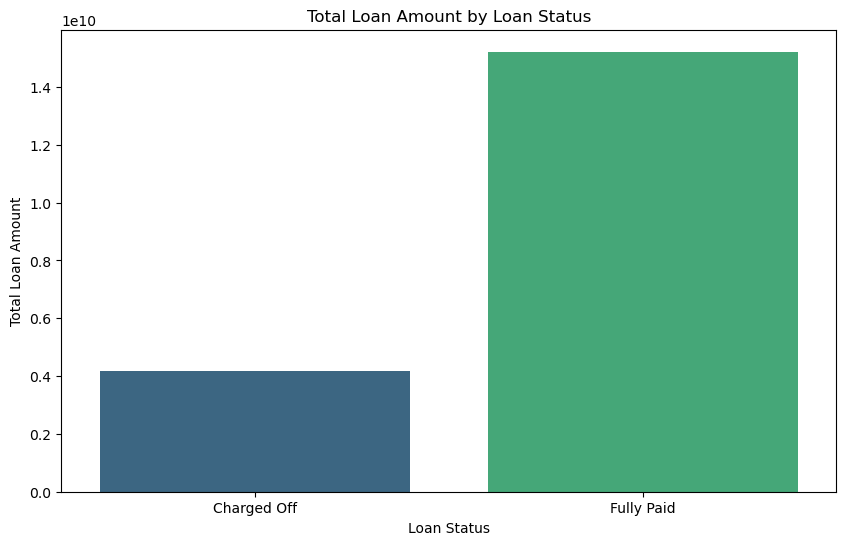

In [93]:
loan_status_mapped = df['loan_status'].replace({0: 'Fully Paid', 1: 'Charged Off'})

# Calculate the total loan amount by loan status
loan_status_sum = df.groupby(loan_status_mapped)['loan_amnt'].sum().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(x='loan_status', y='loan_amnt', data=loan_status_sum, palette="viridis")

plt.title('Total Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Total Loan Amount')
plt.xticks(rotation=0)

plt.show()

### Total Loan Amount:
- "Fully Paid" loans have a significantly higher total amount than "Charged Off" loans.
- This indicates a high success rate in loan recovery.

### Clear Difference:
- There's a noticeable discrepancy between the two statuses.
- "Charged Off" loans represent a small portion of the total, showing low default risk.

### Economic Implications:
- The larger total in "Fully Paid" suggests most customers repay their loans.
- Attention should still be given to "Charged Off" loans to reduce future risks.

### Data Scale:
- Focusing on "Fully Paid" loans may yield higher benefits for the lending company.
- Reducing "Charged Off" loans can optimize profitability.

### Conclusion:
- Although some loans are "Charged Off", most loans are fully paid, reflecting positive outcomes for the company but highlighting the need to improve risk management and credit policies.

C:\Users\Admin\AppData\Local\Temp\ipykernel_17796\2552070244.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='loan_status', y='loan_amnt', data=loan_status_mean, palette="viridis")


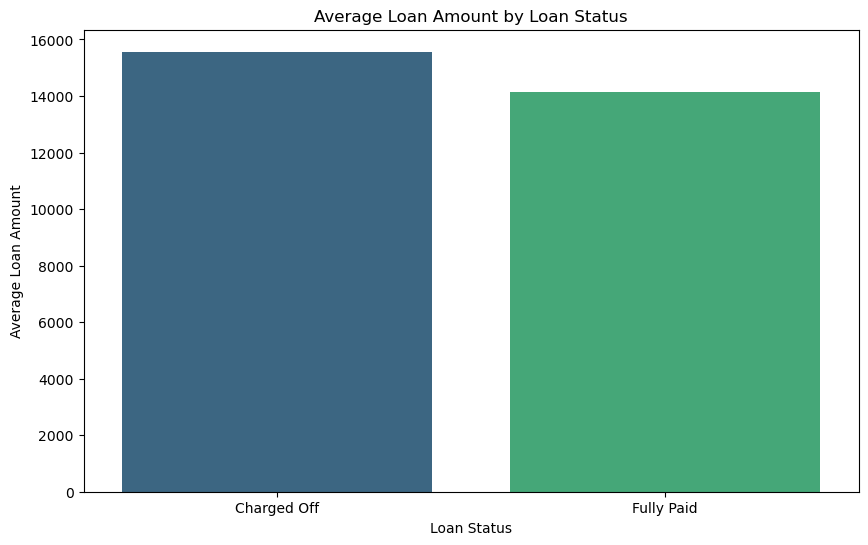

In [100]:
# Calculate the average loan amount by loan status
loan_status_mean = df.groupby(loan_status_mapped)['loan_amnt'].mean().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(x='loan_status', y='loan_amnt', data=loan_status_mean, palette="viridis")

plt.title('Average Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=0)

plt.show()

### Average Loan Amount:

- The chart shows that the average loan amount for "Charged Off" loans is higher than for "Fully Paid" loans.
- Specifically, the average loan amount for "Charged Off" loans is around 16,000, while for "Fully Paid" loans it is about 14,000.

### Economic Implication:

- A higher average loan amount for "Charged Off" loans suggests that larger loans tend to be riskier and more likely to default.
- This could indicate that the lending company should be more cautious when approving larger loans and consider stricter credit evaluations for such loans.

### Risk Management Strategy:

- The chart highlights the importance of managing risks for larger loans. The company may need to apply stricter credit policies or require collateral for larger loans to minimize losses.
- Further analysis of factors like borrower credit score, income, and loan purpose could help the company understand the causes of defaults and implement appropriate preventive measures.

### Conclusion:

- The chart shows that larger loans are more likely to be "Charged Off" compared to smaller loans. This suggests that the company may need to reassess its credit policies to reduce risk andprotect profits.


## Building the model

**Split and preprocess the data**

In [105]:
df = df.dropna()
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Before balancing:
loan_status
0    753040
1    187816
Name: count, dtype: int64


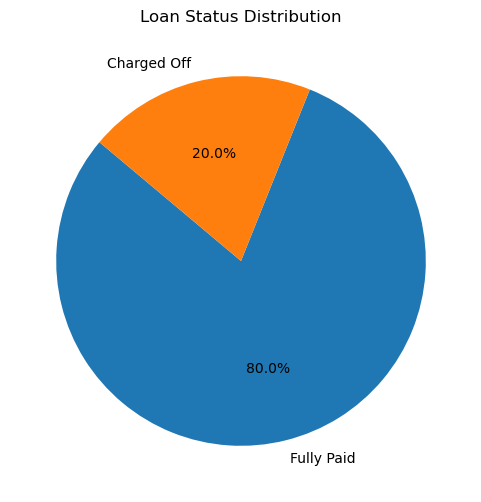

In [109]:
# Print loan status distribution before balancing
print("Before balancing:")
print(y_train.value_counts())
loan_status_counts = y_train.value_counts()

# Map loan status values to labels for the pie chart
labels = loan_status_counts.index.map({1: "Charged Off", 0: "Fully Paid"})

# Create a pie chart to visualize the loan status distribution
plt.figure(figsize=(6, 6))
plt.pie(loan_status_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Loan Status Distribution')
plt.show()

In [111]:
from imblearn.under_sampling import RandomUnderSampler

# Use RandomUnderSampler to balance the data with sampling_strategy=0.5
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=100)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

### Reason for choosing a 2:1 balancing ratio

#### Balancing the class distribution:

A 2:1 ratio means that after balancing, the number of samples in the minority class (customers who did not repay the loan) will be 50% of the number of samples in the majority class (customers who repaid the loan). This helps reduce the data imbalance without significantly losing information from the majority class.

#### Minimizing the risk of losing important information:

- If the balancing ratio is too low, the model will have too few samples from the minority class, which can result in the model not learning the full characteristics of this class.
- If the ratio is too high (e.g., `sampling_strategy=1`), too many samples from the majority class will be removed, potentially causing the loss of valuable information.

A ratio of 0.5 strikes a reasonable balance between these two issues.

#### Improving model performance:

A 0.5 ratio improves the model's ability to learn from both classes. This ensures that the model is not overly biased toward the majority class and improves its ability to detect instances from the minority class.

#### Avoiding overfitting:

If the ratio were set too high (e.g., `sampling_strategy=1`), the model might become overly focused on the minority class due to the increased number of samples, potentially leading to overfitting. By using a 2:1 ratio, we maintain a reasonable amount of majority class data, which helps the model generalize better and avoid overfitting to he minority class.
g overfitting:


After balancing:
loan_status
0    375632
1    187816
Name: count, dtype: int64


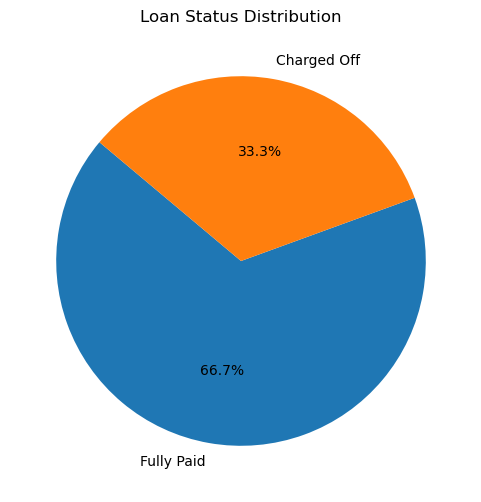

In [119]:
print("After balancing:")
print(y_train_res.value_counts())
loan_status_counts = y_train_res.value_counts()

# Change the values in loan_status_counts for the chart
labels = loan_status_counts.index.map({1: "Charged Off", 0: "Fully Paid"})

# Draw a pie chart
plt.figure(figsize=(6, 6))
plt.pie(loan_status_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Loan Status Distribution')
plt.show()

In [121]:
# Normalize the data
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test_res = scaler.transform(X_test)

In [123]:
# Build and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_res, y_train_res)

LogisticRegression(random_state=42)

In [125]:
# Make predictions on the test set
y_pred = model.predict(X_test_res)

In [127]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8630240263476381
Confusion Matrix:
[[286205  36527]
 [ 18705  61787]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91    322732
           1       0.63      0.77      0.69     80492

    accuracy                           0.86    403224
   macro avg       0.78      0.83      0.80    403224
weighted avg       0.88      0.86      0.87    403224



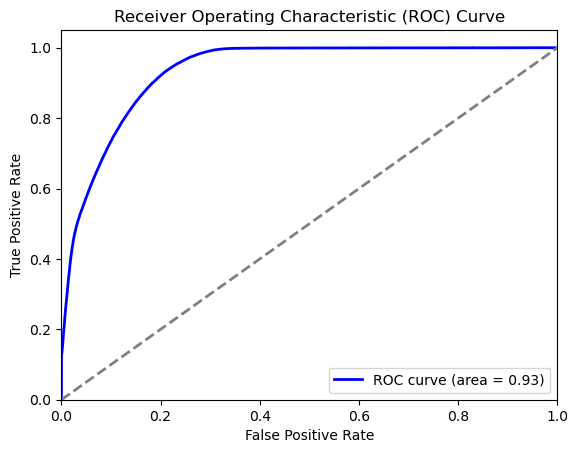

In [129]:
# Calculate predicted probabilities for the test set
y_proba = model.predict_proba(X_test_res)[:, 1]

# Calculate values for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [131]:
# Choose thresholds
thresholds = np.linspace(0.1, 0.9, 9)

# List to store evaluation results
evaluation_scores = []

# Iterate through each threshold
for threshold in thresholds:
    # Predict labels with the current threshold
    predicted_labels = ((model.predict_proba(X_test_res)[:, 1] >= threshold)).astype(int)

    # Calculate metrics: recall, precision, accuracy
    recall = recall_score(y_test, predicted_labels)
    precision = precision_score(y_test, predicted_labels)
    accuracy = accuracy_score(y_test, predicted_labels)
    f1 = f1_score(y_test, predicted_labels)
    # Append the results to the list
    evaluation_scores.append([threshold, recall, precision, accuracy, f1])

# Create DataFrame from the result list
df_scores = pd.DataFrame(evaluation_scores, columns=['Threshold', 'Recall', 'Precision', 'Accuracy', 'F1 Score'])

# Print the result table
print(df_scores)

   Threshold    Recall  Precision  Accuracy  F1 Score
0        0.1  0.998000   0.420363  0.724895  0.591559
1        0.2  0.989018   0.456798  0.763035  0.624950
2        0.3  0.954766   0.504586  0.803844  0.660240
3        0.4  0.883231   0.560940  0.838688  0.686123
4        0.5  0.767617   0.628466  0.863024  0.691107
5        0.6  0.628087   0.706583  0.873693  0.665027
6        0.7  0.524822   0.778964  0.875417  0.627124
7        0.8  0.443050   0.827463  0.870380  0.577102
8        0.9  0.276301   0.875763  0.847710  0.420070


### Reason for Choosing the Threshold of 0.5

- **Highest F1 Score**: The threshold of 0.5 gives the highest F1 Score (0.691), indicating that the model performs best at balancing the detection of defaulters while ensuring these predictions are accurate.
- **Good Precision**: The threshold of 0.5 gives a Precision of 0.628. This means that among the customers predicted by the model to default, 62.8% actually do default. This helps the bank avoid losing potential customers.
- **Adequate Recall**: Although the Recall at a threshold of 0.5 (0.768) is not as high as at 0.4 (0.883), it is still sufficiently high to ensure that most defaulters are detected. This helps the bank mitigate risk.
- **High Accuracy**: The threshold of 0.5 results in a high Accuracy of 0.863, indicating that the model performs well in overall prediction, including both paying and non-paying customers.

> **Conclusion**: With the goal of "Predicting customer debt repayment ability to mitigate risks and protect profits," the threshold of 0.5 is reasonable because it provides the best balance between detecting defaulters (helping mitigate risk) and ensuring that predictions are accurate (helping protect profits).

In [134]:
model.coef_

array([[ 6.36141319e-01,  5.04419368e-01,  6.55232424e-01,
        -9.19025520e-02,  7.98296489e-02,  3.74818937e-04,
         1.97416119e-02,  1.81259688e-01, -2.50784812e-01,
         6.30695917e-02, -9.24290292e-02, -1.95674786e-01,
        -5.58948786e-02, -1.03159068e+01,  1.25131541e-01,
         6.79667220e+00]])

In [136]:
model.intercept_

array([-4.57770804])

In [138]:
means = scaler.mean_
stds = scaler.scale_

In [140]:
means

array([1.45982052e+04, 2.66099090e-01, 1.36609429e+01, 1.16146193e+01,
       6.25292840e-01, 7.51751436e+04, 1.03184677e+00, 1.86072611e+01,
       6.98719119e+02, 1.16492933e+01, 1.60928238e+04, 5.22957637e+01,
       2.49469374e+01, 4.59926274e+03, 1.94055175e-02, 4.10934106e-02])

In [142]:
stds

array([8.73744611e+03, 4.41916694e-01, 4.88362241e+00, 8.27397728e+00,
       6.73325458e-01, 6.96065033e+04, 7.80296627e-01, 1.12140136e+01,
       3.10826189e+01, 5.50455022e+00, 2.21787724e+04, 2.44405649e+01,
       1.20133279e+01, 6.75700535e+03, 1.37945436e-01, 1.98506277e-01])